In [1]:
import numpy as np
import pim_tmr as pim
import fibernet

In [ ]:
N = 500
n = 32
m = 288*n

A = np.random.rand(N,n)*np.exp(1j*2*np.pi*np.random.rand(N,n))
X = np.random.rand(n,m)*np.exp(1j*2*np.pi*np.random.rand(n,m))
B = np.abs(np.dot(A, X))

X_est = pim.pim_tmr(A, B)
B_est = np.abs(np.dot(A, X_est))
print(f"MSE Bs: {pim.mse(B, B_est):0.3e}")

In [3]:
import mat73
import os
from scipy.io import loadmat

path = "C:\\Users\\saucourt\\Datasets"
file = "data_base_28_02.mat"

data = mat73.loadmat(os.path.join(path, file))
# data = loadmat(os.path.join(path, file))

In [32]:
CP = np.reshape(np.array(data['CP']), newshape=(-1, 128, 128))
vec = np.reshape(np.array(data['vecteur_36']) , newshape=(-1, 36))

NN = CP.shape[0]
As = np.zeros(shape=(NN, 32), dtype=complex)
Bs = np.zeros(shape=(NN, 96*96), dtype=float)

amp = fibernet.dataset._utils.make_bellshaped_plane_2d(vec[0].reshape((6,6)))
amp = amp.flatten()

for i in range(NN):
    phi = vec[i]
    phi = amp * np.exp(1j * phi)
    phi = np.delete(vec[i], [0, 5, 30, 35])
    img = CP[i][16:112, 16:112].flatten().astype('float')
    As[i,:] = phi
    Bs[i,:] = np.sqrt(img)

In [125]:
%load_ext autoreload
%autoreload 2

N = 400
idx = np.random.permutation(np.arange(NN))
As_crop = As[idx[:N], :]
Bs_crop = Bs[idx[:N], :]

X_est = pim.pim_tmr(As_crop, Bs_crop, max_iter=10000, tol=20e-9, tol_stag=1e-2, max_stag=5)
B_est = np.abs(np.dot(As_crop, X_est))
print(f"MSE Bs: {pim.mse(Bs_crop, B_est):0.3e}")

i=    0  mse_glob=3.585e-08  mse_convs=9.325e-09  mse_acts=6.306e-08  act= 4550  convs= 4666
i=    1  mse_glob=3.071e-08  mse_convs=9.885e-09  mse_acts=5.692e-08  act= 4081  convs= 5135
i=    2  mse_glob=2.845e-08  mse_convs=1.018e-08  mse_acts=5.381e-08  act= 3859  convs= 5357
i=    3  mse_glob=2.713e-08  mse_convs=1.038e-08  mse_acts=5.196e-08  act= 3711  convs= 5505
i=    4  mse_glob=2.624e-08  mse_convs=1.050e-08  mse_acts=5.052e-08  act= 3624  convs= 5592
i=    5  mse_glob=2.560e-08  mse_convs=1.061e-08  mse_acts=4.956e-08  act= 3546  convs= 5670
i=    6  mse_glob=2.510e-08  mse_convs=1.067e-08  mse_acts=4.869e-08  act= 3499  convs= 5717
Restarting 156 columns 
i=    7  mse_glob=2.471e-08  mse_convs=1.073e-08  mse_acts=4.803e-08  act= 3454  convs= 5762
Restarting 253 columns 
i=    8  mse_glob=2.494e-08  mse_convs=1.091e-08  mse_acts=4.864e-08  act= 3427  convs= 5789
Restarting 255 columns 
i=    9  mse_glob=2.537e-08  mse_convs=1.101e-08  mse_acts=4.993e-08  act= 3401  convs= 581

KeyboardInterrupt: 

[(-0.5, 95.5, 95.5, -0.5),
 (-0.5, 95.5, 95.5, -0.5),
 (-0.5, 95.5, 95.5, -0.5),
 (-0.5, 95.5, 95.5, -0.5)]

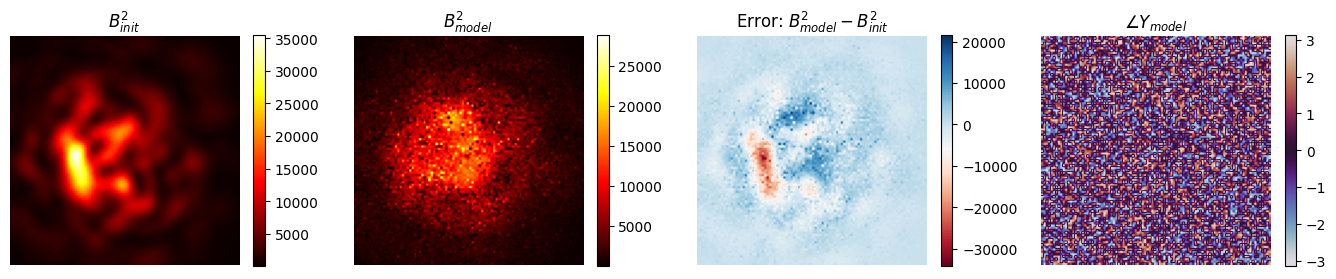

In [86]:
import matplotlib.pyplot as plt

i = 5000
A_init = As_crop[i,:]
Y_model = np.dot(X_est.T, A_init).reshape((96,96))
B_model = np.abs(Y_model)
B_init = Bs_crop[i,:].reshape((96,96))

fig, axs = plt.subplots(1,4, figsize=(17,3))
pl0 = axs[0].imshow(np.square(B_init), cmap="hot")
pl1 = axs[1].imshow(np.square(B_model), cmap="hot")
pl2 = axs[2].imshow(np.square(B_model) - np.square(B_init), cmap="RdBu")
pl3 = axs[3].imshow(np.angle(Y_model), cmap="twilight")
plt.colorbar(pl0, ax=axs[0])
plt.colorbar(pl1, ax=axs[1])
plt.colorbar(pl2, ax=axs[2])
plt.colorbar(pl3, ax=axs[3])
axs[0].set_title(r"$B_{init}^2$")
axs[1].set_title(r"$B_{model}^2$")
axs[2].set_title(r"Error: $B_{model}^2 - B_{init}^2$")
axs[3].set_title(r"$\angle Y_{model}$")
[ axs[i].axis('off') for i in range(4) ]